# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [5]:
path=os.getcwd()
path

'/Users/ajesh_mahto/Desktop/capstone_project'

In [6]:
os.chdir(path + "/Data")
print (os.getcwd())

/Users/ajesh_mahto/Desktop/capstone_project/data


In [7]:
df1= pd.read_csv('step3_output.csv')

In [8]:
df1.head()


,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.000000,150.000000,36.0,69.0,30.0,34.000000,152.0,30.0,0
1,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.000000,115.000000,49.0,250.0,74.0,78.000000,104.0,80.0,1
2,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,...,88.0,174.873239,110.000000,84.0,300.0,47.0,47.000000,107.0,0.0,1
3,Boreal Mountain Resort,California,7700,500,0,0.0,0,1,1,3,...,380.0,200.000000,150.000000,54.0,400.0,49.0,57.916957,150.0,200.0,1
4,Dodge Ridge,California,8200,1600,0,0.0,0,0,1,2,...,862.0,174.873239,115.103943,69.0,350.0,78.0,78.000000,140.0,0.0,1


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 26 columns):
Name                 176 non-null object
state                176 non-null object
summit_elev          176 non-null int64
vertical_drop        176 non-null int64
trams                176 non-null int64
fastEight            176 non-null float64
fastSixes            176 non-null int64
fastQuads            176 non-null int64
quad                 176 non-null int64
triple               176 non-null int64
double               176 non-null int64
surface              176 non-null int64
total_chairs         176 non-null int64
Runs                 176 non-null float64
TerrainParks         176 non-null float64
LongestRun_mi        176 non-null float64
SkiableTerrain_ac    176 non-null float64
Snow Making_ac       176 non-null float64
daysOpenLastYear     176 non-null float64
yearsOpen            176 non-null float64
averageSnowfall      176 non-null float64
AdultWeekday         176 non-null f

## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

Hint: you can see an example of how to execute this in Aiden's article on preprocessing [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967). 

In [10]:
df=pd.get_dummies(df1, columns=['state'],drop_first=True)


In [11]:
df.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Yosemite Ski & Snowboard Area,7800,600,0,0.0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
3,Boreal Mountain Resort,7700,500,0,0.0,0,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Dodge Ridge,8200,1600,0,0.0,0,0,1,2,5,...,0,0,0,0,0,0,0,0,0,0


## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [12]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X= df.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [13]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(100,400):
    X_train,X_test,y_train,y_test=train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=randomState)
    model2=LinearRegression()
    model2.fit(X_train,y_train)
    
    train_score=model2.score(X_train,y_train)
    test_score=model2.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test Score {} Train score {} Random state {}".format(test_score,train_score,randomState))


Test Score 0.8844958960547071 Train score 0.8422724214832539 Random state 236
Test Score 0.8515940569666482 Train score 0.8466928087131427 Random state 240


# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [15]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model1 = lm.fit(X_train,y_train)
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [16]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test

In [17]:
y_pred=lm.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed

In [18]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model

In [19]:
from sklearn.metrics import mean_absolute_error,explained_variance_score

In [20]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Explained variance score:', explained_variance_score(y_test, y_pred))


Mean Absolute Error: 6.305182356199553
Explained variance score: 0.70421270220602


**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [21]:
lm.intercept_

33.13571748612317

In [22]:
lm.coef_

array([-3.65351861e-04,  2.12696474e-03, -1.47020937e-12, -8.75848005e-13,
       -4.32653913e-13, -5.80211674e-01,  2.73562456e+00,  1.78195102e-01,
        2.14294649e-01, -1.55132189e+00,  9.96580751e-01,  1.12177765e-01,
        1.06615367e+00, -2.36067250e-01, -2.47541589e-03, -7.95154563e-03,
        5.23753901e-02, -3.20109926e-02,  3.36351141e-03,  5.08325494e-01,
       -1.35324044e-01,  1.92973414e-02,  6.80211585e-01, -5.11084998e+00,
        6.00836103e-01,  6.84222837e+00,  8.42247094e-01, -6.23856318e+00,
       -1.19405070e+01, -1.16830989e+01, -6.91251645e+00,  4.73649535e+00,
        7.63964565e+00,  5.23805580e+00, -5.31237381e+00, -7.17367790e+00,
       -5.07539724e+00, -5.20195461e+00,  5.45769156e+00,  6.53207996e+00,
        5.65500016e+00, -5.98217934e+00, -5.27183916e-01,  1.24343836e+01,
       -9.52473889e+00, -4.71815210e+00, -7.68139924e-01,  7.67840418e-01,
       -1.13427416e+01,  1.49471067e+01, -2.97896431e+00,  3.74300751e+00,
        1.11371463e+01, -

In [23]:
lm.score(X_train,y_train)

0.8683300861562578

In [24]:
lm.score(X_test,y_test)

0.7024128123426411

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the resulting `AdultWeekend` value. Also, because we took the time to scale our x values in the training data, we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 


Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [25]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False).head(10)


,Coefficient
state_West Virginia,23.932269
state_Tennessee,14.947107
state_North Carolina,12.434384
state_Illinois,11.940507
state_Indiana,11.683099
state_South Dakota,11.342742
state_Virginia,11.137146
state_Ohio,9.524739
state_Maryland,7.639646
state_Minnesota,7.173678


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

Hint: Try to construct another model using exactly the steps we followed above. 

In [26]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1,
                      X,
                      y,
                      cv=10)
scores

array([ 0.69720675,  0.42749993,  0.42964002,  0.44245489,  0.64228195,
        0.70574248,  0.14841986,  0.30424357, -0.02457246,  0.36403291])

In [67]:
print("To get the minimum score Threshold: ",np.min(scores))
print("To understand what maximum score I can achieve from the dataset:",np.max(scores))
print("Average Score Expected:",np.average(scores))

To get the minimum score Threshold:  0.030911568782093113
To understand what maximum score I can achieve from the dataset: 0.8263838620761244
Average Score Expected: 0.4664695742847041


#### Model 2

In [28]:
df1=df1.drop('state',axis=1)

In [29]:
from sklearn.preprocessing import StandardScaler
X=df1.drop(['Name','AdultWeekend'], axis=1)
y=df1['AdultWeekend']
scaler=StandardScaler()
X_scaled_scaled=scaler.fit_transform(X)
y=y.ravel()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model2=LinearRegression()
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred=model2.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error,explained_variance_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Explained variance score:', explained_variance_score(y_test, y_pred))


Mean Absolute Error: 7.238864671453874
Explained variance score: 0.5422532443376239


In [33]:
lm.intercept_

33.13571748612317

In [34]:
lm.coef_

array([-3.65351861e-04,  2.12696474e-03, -1.47020937e-12, -8.75848005e-13,
       -4.32653913e-13, -5.80211674e-01,  2.73562456e+00,  1.78195102e-01,
        2.14294649e-01, -1.55132189e+00,  9.96580751e-01,  1.12177765e-01,
        1.06615367e+00, -2.36067250e-01, -2.47541589e-03, -7.95154563e-03,
        5.23753901e-02, -3.20109926e-02,  3.36351141e-03,  5.08325494e-01,
       -1.35324044e-01,  1.92973414e-02,  6.80211585e-01, -5.11084998e+00,
        6.00836103e-01,  6.84222837e+00,  8.42247094e-01, -6.23856318e+00,
       -1.19405070e+01, -1.16830989e+01, -6.91251645e+00,  4.73649535e+00,
        7.63964565e+00,  5.23805580e+00, -5.31237381e+00, -7.17367790e+00,
       -5.07539724e+00, -5.20195461e+00,  5.45769156e+00,  6.53207996e+00,
        5.65500016e+00, -5.98217934e+00, -5.27183916e-01,  1.24343836e+01,
       -9.52473889e+00, -4.71815210e+00, -7.68139924e-01,  7.67840418e-01,
       -1.13427416e+01,  1.49471067e+01, -2.97896431e+00,  3.74300751e+00,
        1.11371463e+01, -

In [35]:
model2.score(X_train,y_train)

0.8307498147812561

In [36]:
model2.score(X_test,y_test)

0.5096283418141925

In [37]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,
                      X,
                      y,
                      cv=10)
scores

array([0.54705295, 0.33907419, 0.51000942, 0.03091157, 0.82638386,
       0.79213573, 0.4855283 , 0.64793407, 0.03231047, 0.45335518])

In [38]:
print("To get the minimum score Threshold: ",np.min(scores))
print("To understand what maximum score I can achieve from the dataset:",np.max(scores))
print("Average Score Expected:",np.average(scores))

To get the minimum score Threshold:  0.030911568782093113
To understand what maximum score I can achieve from the dataset: 0.8263838620761244
Average Score Expected: 0.4664695742847041


In [40]:
pd.DataFrame(abs(model2.coef_), X.columns, columns=['Coefficient'])

,Coefficient
summit_elev,6.425308e-04
vertical_drop,2.801034e-03
trams,4.586609e-15
fastEight,6.300516e-15
fastSixes,2.109424e-15
fastQuads,4.578005e-01
quad,1.386186e+00
triple,5.588985e-01
double,1.436472e-02
surface,8.560893e-01


**<font color='teal'> When reviewing our new model coefficients, we see `summit_elev` is now in the number two spot. This is also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time, rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [41]:
df1=df1.drop(['summit_elev','vertical_drop'],axis=1)

In [42]:
from sklearn.preprocessing import StandardScaler
X=df1.drop(['Name','AdultWeekend'], axis=1)
y=df1['AdultWeekend']
scaler=StandardScaler()
X_scaled_scaled=scaler.fit_transform(X)
y=y.ravel()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model3=LinearRegression()
model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred=model3.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error,explained_variance_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Explained variance score:', explained_variance_score(y_test, y_pred))

Mean Absolute Error: 7.094223898164006
Explained variance score: 0.5515254517147061


In [46]:
lm.intercept_

33.13571748612317

In [47]:
lm.coef_

array([-3.65351861e-04,  2.12696474e-03, -1.47020937e-12, -8.75848005e-13,
       -4.32653913e-13, -5.80211674e-01,  2.73562456e+00,  1.78195102e-01,
        2.14294649e-01, -1.55132189e+00,  9.96580751e-01,  1.12177765e-01,
        1.06615367e+00, -2.36067250e-01, -2.47541589e-03, -7.95154563e-03,
        5.23753901e-02, -3.20109926e-02,  3.36351141e-03,  5.08325494e-01,
       -1.35324044e-01,  1.92973414e-02,  6.80211585e-01, -5.11084998e+00,
        6.00836103e-01,  6.84222837e+00,  8.42247094e-01, -6.23856318e+00,
       -1.19405070e+01, -1.16830989e+01, -6.91251645e+00,  4.73649535e+00,
        7.63964565e+00,  5.23805580e+00, -5.31237381e+00, -7.17367790e+00,
       -5.07539724e+00, -5.20195461e+00,  5.45769156e+00,  6.53207996e+00,
        5.65500016e+00, -5.98217934e+00, -5.27183916e-01,  1.24343836e+01,
       -9.52473889e+00, -4.71815210e+00, -7.68139924e-01,  7.67840418e-01,
       -1.13427416e+01,  1.49471067e+01, -2.97896431e+00,  3.74300751e+00,
        1.11371463e+01, -

In [48]:
pd.DataFrame(abs(model3.coef_), X.columns, columns=['Coefficient'])

,Coefficient
trams,0.000000e+00
fastEight,2.117750e-14
fastSixes,9.298118e-15
fastQuads,6.515414e-01
quad,2.325831e+00
triple,3.776958e-01
double,2.248080e-01
surface,1.461990e+00
total_chairs,9.128785e-01
Runs,6.496739e-02


In [49]:
model3.score(X_train,y_train)

0.8156368585221556

In [50]:
model3.score(X_test,y_test)

0.5098725804813034

## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell — you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0. |  |-|
| Model 2. | 0.| |'state'|
| Model 3. | 0. | |'state','summit_elev','base_elev'|

Model Selection:

In [51]:
 #Model1 testscore(70)<trainscore(86)- 
 #Model2 testscore(50.9)<trainscore(83)
 #Model3 testscore(50.9)<trainscore(81)

In [52]:
# All the model is not gerneralised model as test score is less than train score and accuracy is less.
#Model is underfitted.
# I would prefer to take dataset with 330rows without outliers removal as most of the data is lost during the removal
#due to which the model with 176 rows is having low accuracy.


In [53]:
smm=pd.read_csv(r'/Users/ajesh_mahto/Desktop/capstone_project/data/step_try.csv')

In [66]:
smm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
Unnamed: 0           330 non-null int64
Name                 330 non-null object
state                330 non-null object
summit_elev          330 non-null int64
vertical_drop        330 non-null int64
trams                330 non-null int64
fastEight            330 non-null float64
fastSixes            330 non-null int64
fastQuads            330 non-null int64
quad                 330 non-null int64
triple               330 non-null int64
double               330 non-null int64
surface              330 non-null int64
total_chairs         330 non-null int64
Runs                 330 non-null float64
TerrainParks         330 non-null float64
LongestRun_mi        330 non-null float64
SkiableTerrain_ac    330 non-null float64
Snow Making_ac       330 non-null float64
daysOpenLastYear     330 non-null float64
yearsOpen            330 non-null float64
averageSnowfall      330 non-null flo

In [54]:
df2=pd.get_dummies(smm, columns=['state'],drop_first=True)

In [57]:
df2.drop('Unnamed: 0',axis=1)

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Alyeska Resort,3939,2500,1,0.0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,0,0.0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,0,0.0,1,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,9500,1000,0,0.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
326,Sleeping Giant Ski Resort,7428,810,0,0.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
327,Snow King Resort,7808,1571,0,0.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
328,Snowy Range Ski & Recreation Area,9663,990,0,0.0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,1


In [58]:
from sklearn.preprocessing import StandardScaler
X=df2.drop(['Name','AdultWeekend'], axis=1)
y=df2['AdultWeekend']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
y=y.ravel()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model3=LinearRegression()
model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
ypred=model3.predict(X_test)

In [61]:
actual_weekened = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})
actual_weekened

,Actual,Predicted
0,57.916957,57.223950
1,88.000000,93.517163
2,74.000000,78.184994
3,78.000000,76.786233
4,57.916957,67.894887
...,...,...
78,84.000000,84.628225
79,85.000000,69.326069
80,44.000000,53.172599
81,59.000000,57.441261


In [62]:
model3.score(X_train,y_train)

0.8985355188653297

In [63]:
model3.score(X_test,y_test)

0.932710837848004

In [64]:
# testscore>trainscore ,its is generalized model for provising best insights about Big mountain management.

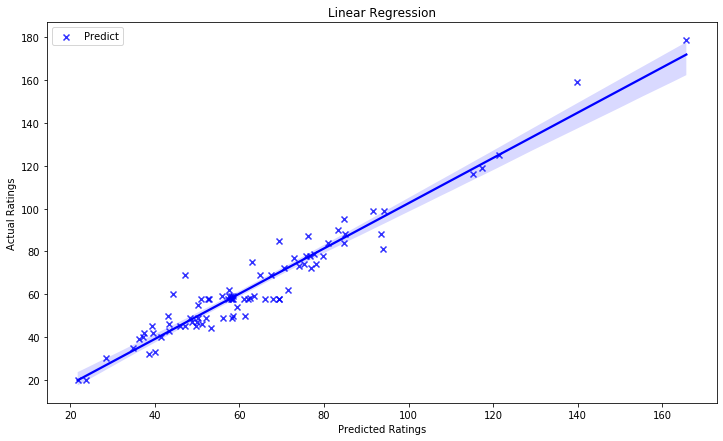

In [65]:
plt.figure(figsize=(12,7))
sns.regplot(ypred,y_test,color='blue', label = 'Predict', marker =
'x')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()